# Decision trees -- CART
## Kulikov Alex, gr. 397

In [1]:
import numpy
import pandas
import scipy
import sklearn
import pprint
import seaborn

%pylab inline
%load_ext autoreload
%autoreload 2

pandas.options.display.max_colwidth = 0

pp = pprint.PrettyPrinter(indent=4)

from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

Populating the interactive namespace from numpy and matplotlib


## Time to look at the data

In [2]:
df = pandas.read_csv("kaggle_data/adult.data")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
print "Head:"
print df.head()
print "Shape:"
print shape(df)

Head:
   age          workclass  fnlwgt   education  education-num  \
0  39    State-gov         77516    Bachelors  13              
1  50    Self-emp-not-inc  83311    Bachelors  13              
2  38    Private           215646   HS-grad    9               
3  53    Private           234721   11th       7               
4  28    Private           338409   Bachelors  13              

        marital-status          occupation    relationship    race      sex  \
0   Never-married        Adm-clerical        Not-in-family   White   Male     
1   Married-civ-spouse   Exec-managerial     Husband         White   Male     
2   Divorced             Handlers-cleaners   Not-in-family   White   Male     
3   Married-civ-spouse   Handlers-cleaners   Husband         Black   Male     
4   Married-civ-spouse   Prof-specialty      Wife            Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  label  
0  2174          0             40               United-States  

In [5]:
df.groupby("label").count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
label,,,,,,,,,,,,,,
0,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
1,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [6]:
for column in df.columns:
    print(column + str(shape(df.groupby(column))))

age(73, 2)
workclass(9, 2)
fnlwgt(21648, 2)
education(16, 2)
education-num(16, 2)
marital-status(7, 2)
occupation(15, 2)
relationship(6, 2)
race(5, 2)
sex(2, 2)
capital-gain(119, 2)
capital-loss(92, 2)
hours-per-week(94, 2)
native-country(42, 2)
label(2, 2)


In [7]:
df.groupby("native-country").count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,label
native-country,,,,,,,,,,,,,,
?,583,583,583,583,583,583,583,583,583,583,583,583,583,583
Cambodia,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Canada,121,121,121,121,121,121,121,121,121,121,121,121,121,121
China,75,75,75,75,75,75,75,75,75,75,75,75,75,75
Columbia,59,59,59,59,59,59,59,59,59,59,59,59,59,59
Cuba,95,95,95,95,95,95,95,95,95,95,95,95,95,95
Dominican-Republic,70,70,70,70,70,70,70,70,70,70,70,70,70,70
Ecuador,28,28,28,28,28,28,28,28,28,28,28,28,28,28
El-Salvador,106,106,106,106,106,106,106,106,106,106,106,106,106,106


In [8]:
df.groupby("workclass").count()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
workclass,,,,,,,,,,,,,,
?,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
Federal-gov,960,960,960,960,960,960,960,960,960,960,960,960,960,960
Local-gov,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093
Never-worked,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Private,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696
Self-emp-inc,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116
Self-emp-not-inc,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541
State-gov,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
Without-pay,14,14,14,14,14,14,14,14,14,14,14,14,14,14


## Let's encode'em

In [9]:
from sklearn import preprocessing

def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [10]:
pp.pprint(encoders)

{   'education': LabelEncoder(),
    'marital-status': LabelEncoder(),
    'native-country': LabelEncoder(),
    'occupation': LabelEncoder(),
    'race': LabelEncoder(),
    'relationship': LabelEncoder(),
    'sex': LabelEncoder(),
    'workclass': LabelEncoder()}


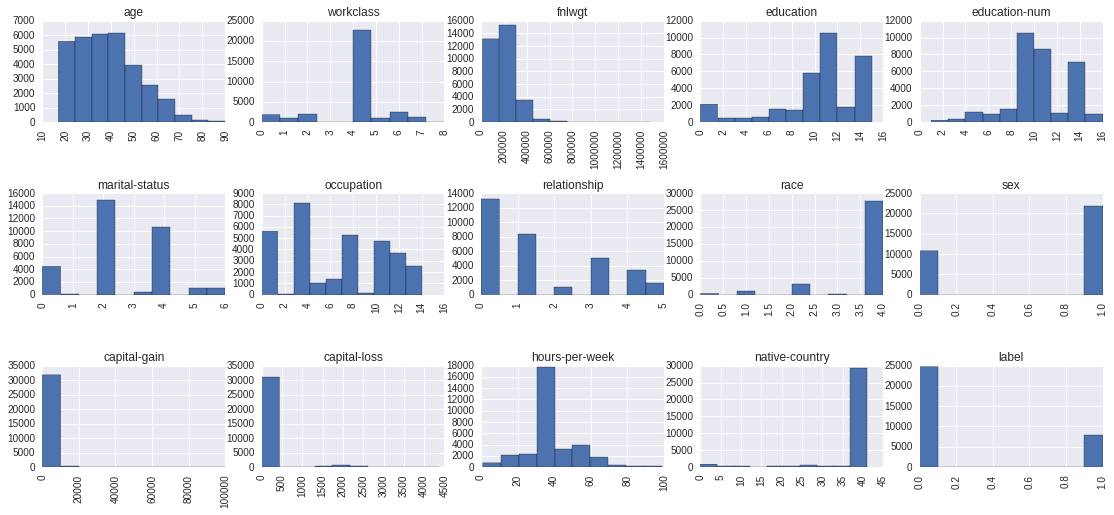

In [11]:
fig = plt.figure(figsize=(19,8))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

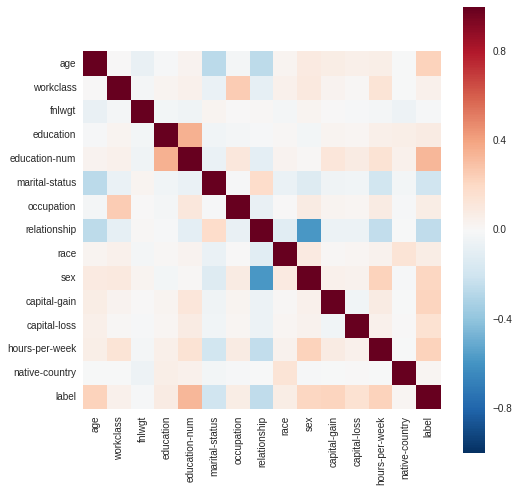

In [12]:
plt.subplots(figsize=(8,8))
encoded_data, encoders = number_encode_features(df)
seaborn.heatmap(encoded_data.corr(), square=True)
plt.show()

In [13]:
X_train, y_train = encoded_data[encoded_data.columns[:-1]].values, encoded_data[encoded_data.columns[-1]].values

## Let's look at the sklearn tree classifier

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=3)
%time clf = clf.fit(X_train[:1000], y_train[:1000])
# %time clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf,out_file="treeSklearn.dot")

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 4.89 ms


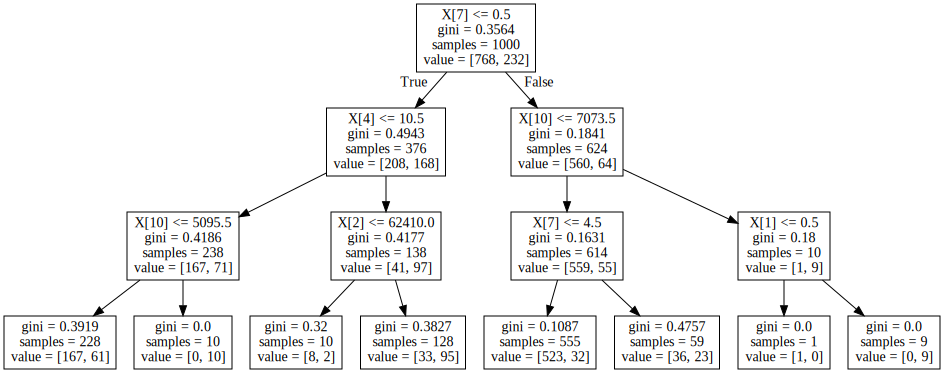

In [15]:
from graphviz import Source

dot_source = open("treeSklearn.dot").read()

dot = Source(dot_source)

dot

## Decision tree (CART)
You could use this doc to implement (and hopefully understand) CART: ftp://public.dhe.ibm.com/software/analytics/spss/support/Stats/Docs/Statistics/Algorithms/13.0/TREE-CART.pdf

### Gini

In [16]:
import CART

ORDINAL_COLUMNS = {3 : "education"}

CONTINUOUS_COLUMNS = {
    0 : "age",
    2 : "fnlwgt",
    4 : "education-num",
    10 : "capital-gain",
    11 : "capital-loss",
    12 : "hours/week"}

CATEGORICAL_COLUMNS = {
    1 : "workclass",
    5 : "marriage",
    7 : "relationship",
    8 : "race",
    9 : "sex"}

CATEGORICAL_COLUMNS_SLOW = {
    6 : "occupation",
    13 : "country"}

cart = CART.CART(1, 3, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW)
%time cart = cart.fit(X_train[:1000], y_train[:1000])

Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
Current node: 6
7 not split because of max depth
8 not split because of max depth
9 not split because of max depth
10 not split because of max depth
11 not split because of max depth
12 not split because of max depth
13 not split because of max depth
14 not split because of max depth
CPU times: user 13.3 s, sys: 16.7 ms, total: 13.3 s
Wall time: 13.3 s


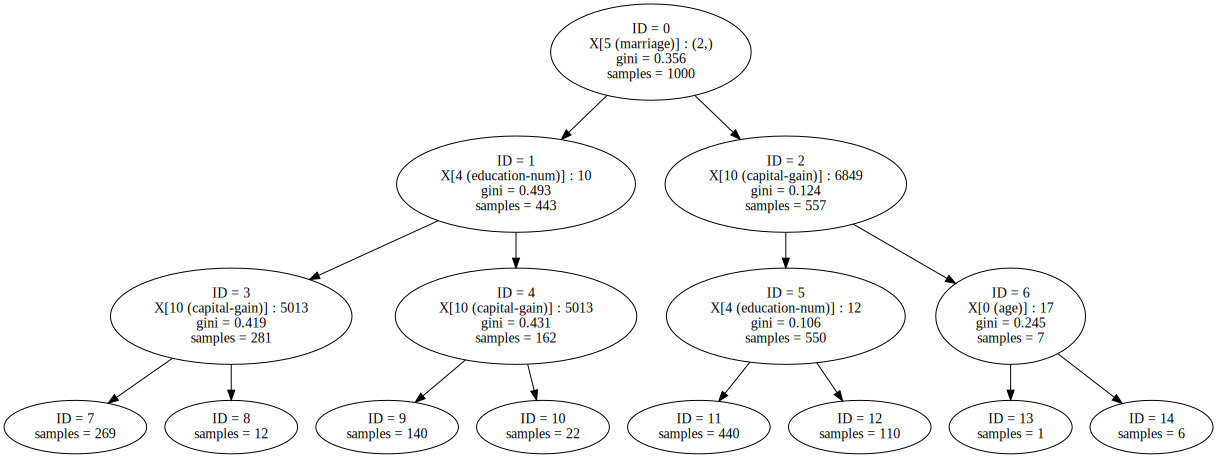

In [17]:
from graphviz import Source

cart.dot_print_tree("CARTgini3.dot")

dot_source = open("CARTgini3.dot").read()

dot = Source(dot_source)

dot

In [18]:
bad = 0
window = 200

for node_index in range(1000, 1000 + window):
    y_pred, node_pred = cart.predict(numpy.array([X_train[node_index]]))

    if y_train[node_index] != y_pred:
        bad += 1

print("Misclassified " + str(bad) + " out of " + str(window) + ", that gives us about " + str(float((window - bad))/window * 100) + "% of success")

Misclassified 40 out of 200, that gives us about 80.0% of success


### Twoing

In [19]:
import CART

ORDINAL_COLUMNS = {3 : "education"}

CONTINUOUS_COLUMNS = {
    0 : "age",
    2 : "fnlwgt",
    4 : "education-num",
    10 : "capital-gain",
    11 : "capital-loss",
    12 : "hours/week"}

CATEGORICAL_COLUMNS = {
    1 : "workclass",
    5 : "marriage",
    7 : "relationship",
    8 : "race",
    9 : "sex"}

CATEGORICAL_COLUMNS_SLOW = {
    6 : "occupation",
    13 : "country"}

cart = CART.CART(1, 3, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW, criterion="twoing")
%time cart = cart.fit(X_train[:1000], y_train[:1000])

Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
Current node: 6
7 not split because of max depth
8 not split because of max depth
9 not split because of max depth
10 not split because of max depth
11 not split because of max depth
12 not split because of max depth
13 not split because of max depth
14 not split because of max depth
CPU times: user 9.76 s, sys: 20 ms, total: 9.78 s
Wall time: 9.75 s


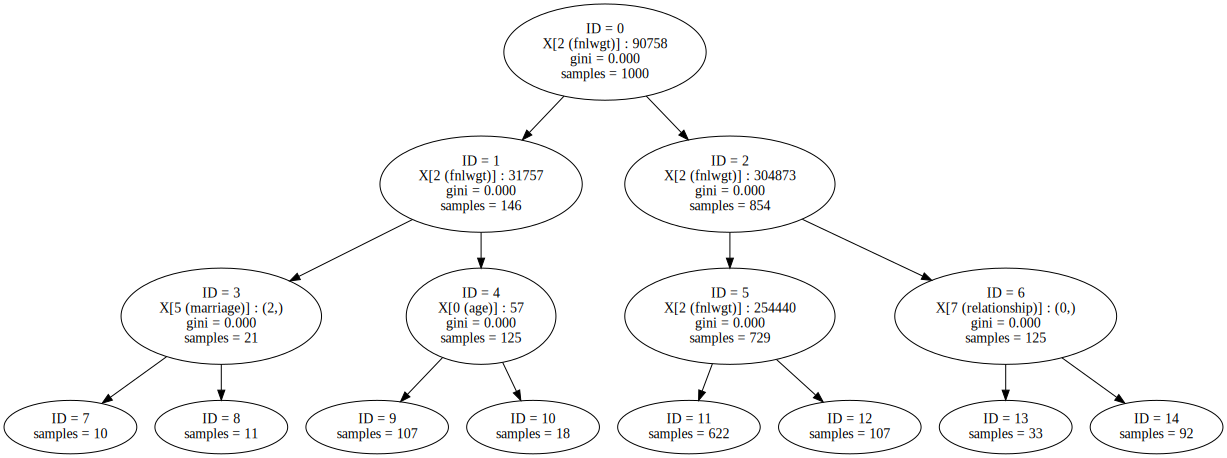

In [20]:
from graphviz import Source

cart.dot_print_tree("CARTtwoing3.dot")

dot_source = open("CARTtwoing3.dot").read()

dot = Source(dot_source)

dot

In [21]:
bad = 0
window = 200

for node_index in range(1000, 1000 + window):
    y_pred, node_pred = cart.predict(numpy.array([X_train[node_index]]))

    if y_train[node_index] != y_pred:
        bad += 1

print("Misclassified " + str(bad) + " out of " + str(window) + ", that gives us about " + str(float((window - bad))/window * 100) + "% of success")

Misclassified 54 out of 200, that gives us about 73.0% of success


### Ordered Twoing

In [35]:
import CART

ORDINAL_COLUMNS = {3 : "education"}

CONTINUOUS_COLUMNS = {
    0 : "age",
    2 : "fnlwgt",
    4 : "education-num",
    10 : "capital-gain",
    11 : "capital-loss",
    12 : "hours/week"}

CATEGORICAL_COLUMNS = {
    1 : "workclass",
    5 : "marriage",
    7 : "relationship",
    8 : "race",
    9 : "sex"}

CATEGORICAL_COLUMNS_SLOW = {
    6 : "occupation",
    13 : "country"}

cart = CART.CART(1, 3, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW, criterion="ordered_twoing")
%time cart = cart.fit(X_train[:1000], y_train[:1000])

Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
Current node: 6
7 not split because of max depth
8 not split because of max depth
9 not split because of max depth
10 not split because of max depth
11 not split because of max depth
12 not split because of max depth
13 not split because of max depth
14 not split because of max depth
CPU times: user 7.77 s, sys: 46.7 ms, total: 7.81 s
Wall time: 7.71 s


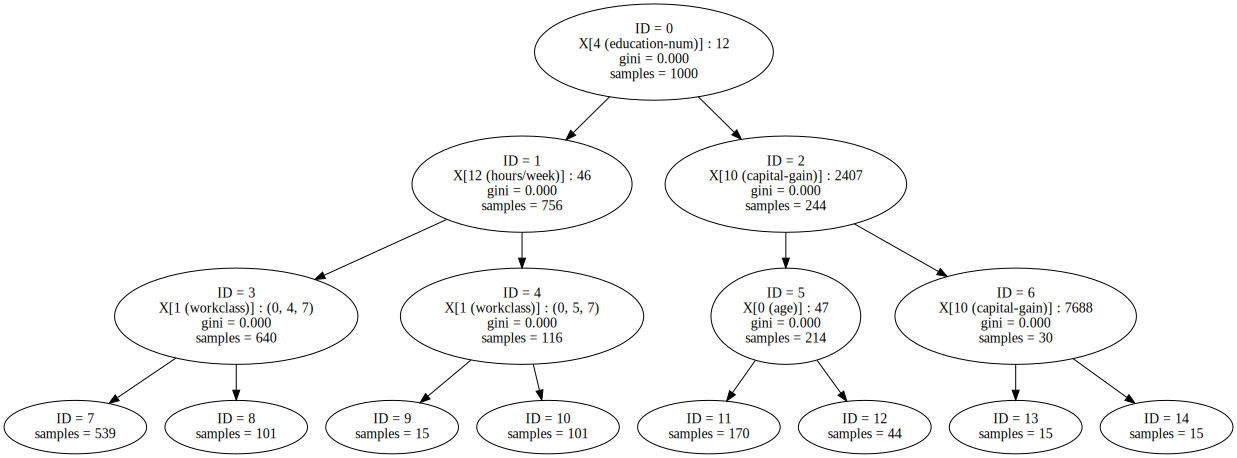

In [36]:
from graphviz import Source

cart.dot_print_tree("CARTorderedtwoing3.dot")

dot_source = open("CARTorderedtwoing3.dot").read()

dot = Source(dot_source)

dot

In [37]:
bad = 0
window = 200

for node_index in range(1000, 1000 + window):
    y_pred, node_pred = cart.predict(numpy.array([X_train[node_index]]))

    if y_train[node_index] != y_pred:
        bad += 1

print("Misclassified " + str(bad) + " out of " + str(window) + ", that gives us about " + str(float((window - bad))/window * 100) + "% of success")

Misclassified 47 out of 200, that gives us about 76.5% of success


### Not very useful criterion here, cause we have only 2 classes

## Optional part: Pruning
More information you could get here: http://www.dcc.fc.up.pt/~ltorgo/PhD/th4.pdf

In [22]:
import CART

ORDINAL_COLUMNS = {3 : "education"}

CONTINUOUS_COLUMNS = {
    0 : "age",
    2 : "fnlwgt",
    4 : "education-num",
    10 : "capital-gain",
    11 : "capital-loss",
    12 : "hours/week"}

CATEGORICAL_COLUMNS = {
    1 : "workclass",
    5 : "marriage",
    7 : "relationship",
    8 : "race",
    9 : "sex"}

CATEGORICAL_COLUMNS_SLOW = {
    6 : "occupation",
    13 : "country"}

cart = CART.CART(1, 5, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW)
%time cart = cart.fit(X_train[:1000], y_train[:1000])

Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
Current node: 6
Current node: 7
8 not split because of 1 class
Current node: 9
10 not split because of 1 class
Current node: 11
Current node: 12
13 not split because of 1 class
14 not split because of 1 class
Current node: 15
Current node: 16
Current node: 19
20 not split because of 1 class
Current node: 23
Current node: 24
Current node: 25
Current node: 26
31 not split because of max depth
32 not split because of max depth
33 not split because of max depth
34 not split because of max depth
39 not split because of max depth
40 not split because of max depth
47 not split because of max depth
48 not split because of max depth
49 not split because of max depth
50 not split because of max depth
51 not split because of max depth
52 not split because of max depth
53 not split because of max depth
54 not split because of max depth
CPU times: user 17 s, sys: 26.7 ms, total: 17 s
Wall time: 17 s


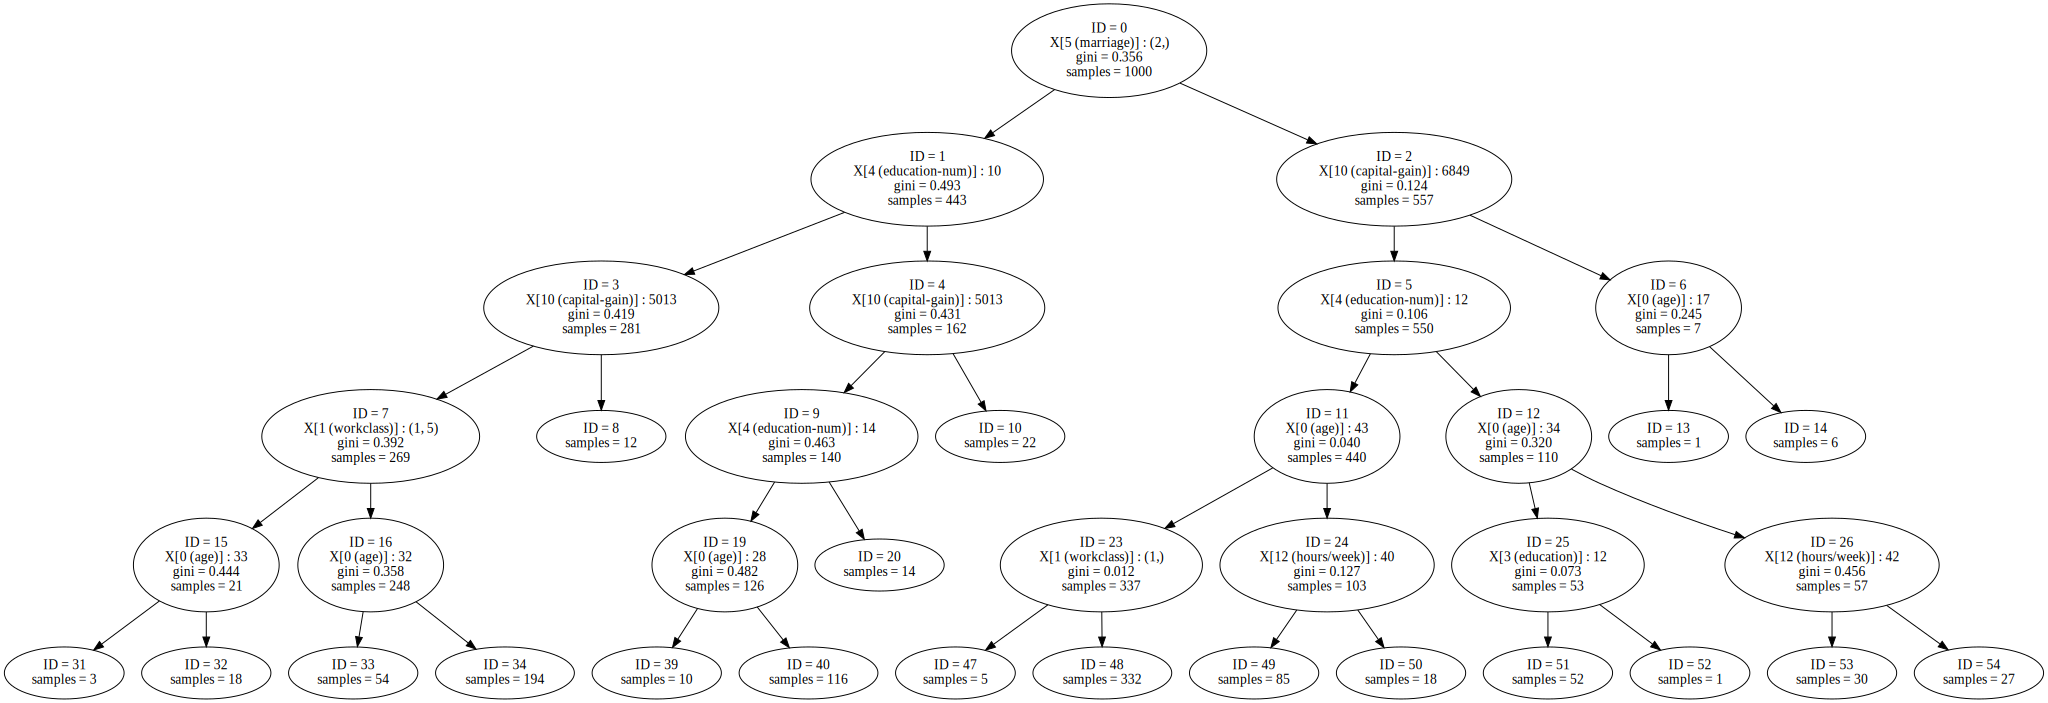

In [23]:
from graphviz import Source

cart.dot_print_tree("CARTgini5NOprune.dot")

dot_source = open("CARTgini5NOprune.dot").read()

dot = Source(dot_source)

dot

In [24]:
cart.prune(1, 0.2)

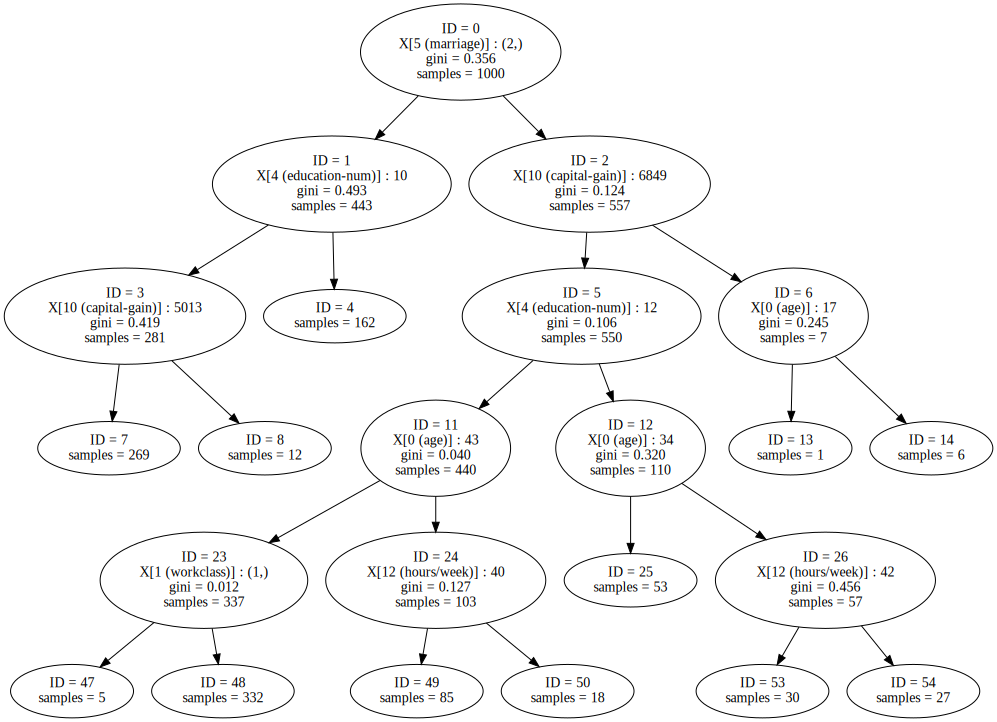

In [25]:
from graphviz import Source

cart.dot_print_tree("CARTgini5prune.dot")

dot_source = open("CARTgini5prune.dot").read()

dot = Source(dot_source)

dot

### Pruned!

## Tree comparison visualisation

Current node: 0
Current node: 1
Current node: 2
3 not split because of 1 class
Current node: 4
Current node: 5
6 not split because of 1 class
9 not split because of 1 class
Current node: 10
Current node: 11
12 not split because of 1 class
21 not split because of 1 class
Current node: 22
Current node: 23
24 not split because of 1 class
45 not split because of max depth
46 not split because of max depth
47 not split because of max depth
48 not split because of max depth
CPU times: user 53.3 ms, sys: 0 ns, total: 53.3 ms
Wall time: 54.1 ms
Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
6 not split because of 1 class
7 not split because of 1 class
Current node: 8
Current node: 9
Current node: 10
11 not split because of 1 class
12 not split because of 1 class
17 not split because of 1 class
18 not split because of 1 class
19 not split because of 1 class
Current node: 20
Current node: 21
Current node: 22
41 not split because of max depth
42 no

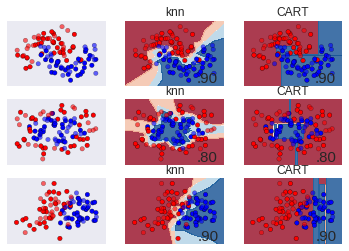

In [50]:
# 1) Сгенерируйте 3 двумерных двухклассовых выборки
# 2) Обучите на нах классификаторы: Ваше деврево, kNN
# 3) С постоянным шагом по каждой координате проведите классфикацию точек плоскости
# 4) Какой классфикатор работает лучше, в чем преимущества и недостатки Решаюших деревьев и KNN для этих выборок?

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
import CART

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

names = ["MyCART", "knn"]
knn = KNeighborsClassifier(3)

step = 0.01
i = 1

for ds in datasets:
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 3, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    ax = plt.subplot(len(datasets), 3, i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(knn, "decision_function"):
        Z = knn.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("knn")
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1
    

    ax = plt.subplot(len(datasets), 3, i)
    
    
    ORDINAL_COLUMNS = {}
    
    CONTINUOUS_COLUMNS = {
        0 : "x",
        1 : "y"}
    
    CATEGORICAL_COLUMNS = {}
    
    CATEGORICAL_COLUMNS_SLOW = {}

    cart_datasets = CART.CART(1, 5, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW, criterion="gini")
    %time cart_datasets = cart_datasets.fit(ds[0], ds[1])
    
    min_x = min(ds[0][0])
    max_x = max(ds[0][0])
    min_y = min(ds[0][1])
    max_y = max(ds[0][1])
    
    plane = numpy.zeros((xx.shape))
    
    x_index = 0
    y_index = 0
    
    plane, tmp = cart_datasets.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plane = plane.reshape(xx.shape)
    
    
    # Put the result into a color plot
    ax.contourf(xx, yy, plane, cmap=cm, alpha = .8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("CART")
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1
           
    
    


### Overall result is quite good

Even the moons were divided properly

Still, scikit-knn is better

Как ни странно, для 3 датасета дерево оказалось так себе. Видимо, это из-за диагональности границы между классами.

Для лун у CART не хватает глубины 3, чтобы корректно распознать внутренность луны

## Tree bagging
The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X=x_1,...,x_n$ with responses $Y = y_1, ..., y_n$, bagging repeatedly ($ B $ times) selects a random sample with replacement of the training set and fits trees to these samples.
After training, predictions for unseen samples $ x' $ can be made by averaging the predictions from all the individual regression trees on $x'$:

$$ \hat{f} = \frac{1}{B} \sum_{b=1}^B \hat{f}_b (x') $$

or by taking the majority vote in the case of decision trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

In [38]:
def shuffle_in_unison_inplace(a, b):
    assert len(a) == len(b)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [39]:
def bagging(X, y, size):
    X, y = shuffle_in_unison_inplace(X, y)
    sample_X, sample_y = X[:size], y[:size]
    return sample_X, sample_y

In [114]:
import CART

ORDINAL_COLUMNS = {3 : "education"}

CONTINUOUS_COLUMNS = {
    0 : "age",
    2 : "fnlwgt",
    4 : "education-num",
    10 : "capital-gain",
    11 : "capital-loss",
    12 : "hours/week"}

CATEGORICAL_COLUMNS = {
    1 : "workclass",
    5 : "marriage",
    7 : "relationship",
    8 : "race",
    9 : "sex"}

CATEGORICAL_COLUMNS_SLOW = {
    6 : "occupation",
    13 : "country"}

class Forest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees):
        self.num_trees = num_trees
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging.
        '''
        
        for index in range(self.num_trees):
            one_tree = CART.CART(1, 7, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW)
            X_train_sample, y_train_sample = bagging(X_train, y_train, 1000)
            %time one_tree = one_tree.fit(X_train_sample, y_train_sample)
            self.trees.append(one_tree)
        
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''

        y_pred = numpy.zeros(X_test.shape[0])

        for index in range(self.num_trees):
#             print(X_test.shape)
            one_y_pred, one_node_pred = self.trees[index].predict(numpy.array(X_test))
#             print(one_y_pred.shape)
#             print(one_y_pred)
            y_pred += one_y_pred
            
        for result in range(y_pred.__len__()):
            y_pred[result] = (float(y_pred[result]/self.num_trees))

        return y_pred

In [100]:
forest = Forest(10)
forest = forest.fit(X_train, y_train)

Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
6 not split because of 1 class
Current node: 7
8 not split because of 1 class
Current node: 9
Current node: 10
Current node: 11
Current node: 12
Current node: 15
Current node: 16
19 not split because of 1 class
Current node: 20
Current node: 21
Current node: 22
Current node: 23
Current node: 24
25 not split because of 1 class
26 not split because of 1 class
Current node: 31
32 not split because of 1 class
Current node: 33
Current node: 34
Current node: 41
Current node: 42
Current node: 43
44 not split because of 1 class
Current node: 45
46 not split because of 1 class
Current node: 47
Current node: 48
Current node: 49
Current node: 50
63 not split because of 1 class
Current node: 64
Current node: 67
Current node: 68
69 not split because of 1 class
Current node: 70
Current node: 83
Current node: 84
Current node: 85
86 not split because of 1 class
87 not split because of 1 class
88 not split b

In [102]:
window = 400

%time y_pred = forest.predict(X_train[:window])
    
for index in range(window):
    y_pred[index] = int(y_pred[index])

bad = 0

for node_index in range(window):
    if y_train[node_index] != y_pred[node_index]:
        bad += 1

print("Misclassified " + str(bad) + " out of " + str(window) + ", that gives us about " + str(float((window - bad))/window * 100) + "% of success")

(400, 14)
(400,)
[ 0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.
  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  

## Code F1 score and Cross Validation Process
You could use sklearn functions instead.

In [115]:
# F1
from sklearn.metrics import f1_score

def f1(y_true, y_predict):
    return f1_score(y_true, y_predict)

In [116]:
# Cross validation

from sklearn.cross_validation import cross_val_score

forest = Forest(10)

def cross_validation(X, y, metric, cv_fold=5):
    return cross_val_score(forest, X, y, cv = cv_fold, n_jobs=-1)

In [117]:
print(cross_validation(X_train[:1000], y_train[:1000], "gini"))

CPU times: user 20.7 s, sys: 6.67 ms, total: 20.8 s
Wall time: 22.5 s
CPU times: user 23.1 s, sys: 36.7 ms, total: 23.1 s
Wall time: 25.6 s
CPU times: user 22.5 s, sys: 10 ms, total: 22.6 s
Wall time: 25.8 s
CPU times: user 23.8 s, sys: 10 ms, total: 23.8 s
Wall time: 27.7 s
CPU times: user 20.9 s, sys: 23.3 ms, total: 20.9 s
Wall time: 23.6 s
CPU times: user 22.7 s, sys: 16.7 ms, total: 22.7 s
Wall time: 24.3 s
CPU times: user 22.4 s, sys: 13.3 ms, total: 22.4 s
Wall time: 24.2 s
CPU times: user 23.7 s, sys: 0 ns, total: 23.7 s
Wall time: 25.4 s
CPU times: user 20.8 s, sys: 0 ns, total: 20.8 s
Wall time: 21.9 s
CPU times: user 22.3 s, sys: 6.67 ms, total: 22.3 s
Wall time: 22.7 s
CPU times: user 22.7 s, sys: 3.33 ms, total: 22.7 s
Wall time: 23.7 s
CPU times: user 23.5 s, sys: 3.33 ms, total: 23.5 s
Wall time: 24.4 s
CPU times: user 20.6 s, sys: 3.33 ms, total: 20.6 s
Wall time: 21 s
CPU times: user 22.1 s, sys: 3.33 ms, total: 22.1 s
Wall time: 22.8 s
CPU times: user 22.5 s, sys: 3.3

## Final result

In [119]:
test_df = pandas.read_csv("kaggle_data/adult.test")

In [120]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,51,Private,335997,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,40,United-States
1,50,Private,98227,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
2,48,Local-gov,204629,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,Canada
3,32,Private,246038,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States
4,42,Private,67243,1st-4th,2,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,55,Portugal


In [121]:
print "Head:"
print test_df.head()
print "Shape:"
print shape(test_df)

Head:
   age   workclass  fnlwgt   education  education-num       marital-status  \
0  51    Private    335997   HS-grad    9               Married-civ-spouse   
1  50    Private    98227    HS-grad    9               Divorced             
2  48    Local-gov  204629   Doctorate  16              Married-civ-spouse   
3  32    Private    246038   Bachelors  13              Never-married        
4  42    Private    67243    1st-4th    2               Married-civ-spouse   

        occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Craft-repair     Husband         White   Male  0             1902           
1   Craft-repair     Not-in-family   White   Male  0             0              
2   Prof-specialty   Husband         White   Male  15024         0              
3   Prof-specialty   Not-in-family   White   Male  0             0              
4   Adm-clerical     Husband         White   Male  0             0              

   hours-per-week  native-country  
0 

In [123]:
for column in test_df.columns:
    print(column + str(shape(test_df.groupby(column))))

age(70, 2)
workclass(8, 2)
fnlwgt(5573, 2)
education(16, 2)
education-num(16, 2)
marital-status(7, 2)
occupation(15, 2)
relationship(6, 2)
race(5, 2)
sex(2, 2)
capital-gain(83, 2)
capital-loss(57, 2)
hours-per-week(86, 2)
native-country(41, 2)


In [124]:
test_df.groupby("native-country").count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
native-country,,,,,,,,,,,,,
?,112,112,112,112,112,112,112,112,112,112,112,112,112
Cambodia,3,3,3,3,3,3,3,3,3,3,3,3,3
Canada,30,30,30,30,30,30,30,30,30,30,30,30,30
China,18,18,18,18,18,18,18,18,18,18,18,18,18
Columbia,8,8,8,8,8,8,8,8,8,8,8,8,8
Cuba,15,15,15,15,15,15,15,15,15,15,15,15,15
Dominican-Republic,10,10,10,10,10,10,10,10,10,10,10,10,10
Ecuador,3,3,3,3,3,3,3,3,3,3,3,3,3
El-Salvador,11,11,11,11,11,11,11,11,11,11,11,11,11


In [125]:
test_df.groupby("workclass").count()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
workclass,,,,,,,,,,,,,
?,265,265,265,265,265,265,265,265,265,265,265,265,265
Federal-gov,260,260,260,260,260,260,260,260,260,260,260,260,260
Local-gov,457,457,457,457,457,457,457,457,457,457,457,457,457
Private,4239,4239,4239,4239,4239,4239,4239,4239,4239,4239,4239,4239,4239
Self-emp-inc,382,382,382,382,382,382,382,382,382,382,382,382,382
Self-emp-not-inc,542,542,542,542,542,542,542,542,542,542,542,542,542
State-gov,295,295,295,295,295,295,295,295,295,295,295,295,295
Without-pay,4,4,4,4,4,4,4,4,4,4,4,4,4


## Let's encode'em

In [126]:
from sklearn import preprocessing

def number_encode_features(test_df):
    result = test_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data_test, encoders_test = number_encode_features(test_df)
encoded_data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,51,3,335997,11,9,2,3,0,4,1,0,1902,40,38
1,50,3,98227,11,9,0,3,1,4,1,0,0,40,38
2,48,2,204629,10,16,2,10,0,4,1,15024,0,45,2
3,32,3,246038,9,13,4,10,1,4,1,0,0,40,38
4,42,3,67243,3,2,2,1,0,4,1,0,0,55,31


In [127]:
pp.pprint(encoders_test)

{   'education': LabelEncoder(),
    'marital-status': LabelEncoder(),
    'native-country': LabelEncoder(),
    'occupation': LabelEncoder(),
    'race': LabelEncoder(),
    'relationship': LabelEncoder(),
    'sex': LabelEncoder(),
    'workclass': LabelEncoder()}


In [150]:
X_test = encoded_data_test[encoded_data_test.columns[:]].values

In [151]:
X_test.shape

(6444, 14)

In [176]:
print(X_train.shape)
print(y_train.shape)

(32561, 14)
(32561,)


In [230]:
import CART

ORDINAL_COLUMNS = {3 : "education"}

CONTINUOUS_COLUMNS = {
    0 : "age",
    2 : "fnlwgt",
    4 : "education-num",
    10 : "capital-gain",
    11 : "capital-loss",
    12 : "hours/week"}

CATEGORICAL_COLUMNS = {
    1 : "workclass",
    5 : "marriage",
    7 : "relationship",
    8 : "race",
    9 : "sex"}

CATEGORICAL_COLUMNS_SLOW = {
    6 : "occupation",
    13 : "country"}

cart = CART.CART(1, 5, ORDINAL_COLUMNS, CONTINUOUS_COLUMNS, CATEGORICAL_COLUMNS, CATEGORICAL_COLUMNS_SLOW)
%time cart = cart.fit(X_train[:1000], y_train[:1000])

Current node: 0
Current node: 1
Current node: 2
Current node: 3
Current node: 4
Current node: 5
Current node: 6
Current node: 7
8 not split because of 1 class
Current node: 9
10 not split because of 1 class
Current node: 11
Current node: 12
13 not split because of 1 class
14 not split because of 1 class
Current node: 15
Current node: 16
Current node: 19
20 not split because of 1 class
Current node: 23
Current node: 24
Current node: 25
Current node: 26
31 not split because of max depth
32 not split because of max depth
33 not split because of max depth
34 not split because of max depth
39 not split because of max depth
40 not split because of max depth
47 not split because of max depth
48 not split because of max depth
49 not split because of max depth
50 not split because of max depth
51 not split because of max depth
52 not split because of max depth
53 not split because of max depth
54 not split because of max depth
CPU times: user 16.3 s, sys: 33.3 ms, total: 16.3 s
Wall time: 16.3 

In [231]:
%time y_pred, node_pred = cart.predict(numpy.array(X_test))


0
1000
2000
3000
4000
5000
6000
CPU times: user 493 ms, sys: 73.3 ms, total: 567 ms
Wall time: 488 ms


In [232]:
test_df["label"] = numpy.zeros(test_df.shape[0])

In [233]:
print(test_df.shape)

(6444, 2)


In [234]:
print(y_pred.shape)

(6444,)


In [235]:
print(numpy.count_nonzero(y_pred))

2670


In [236]:
test_df["label"] = y_pred
test_df["id"] = test_df.index

In [237]:
test_df = test_df[['id', 'label']]
test_df.columns = ['Id', 'label']

In [238]:
test_df.to_csv('solution.csv', index=False)

In [239]:
!wc -l solution.csv

6445 solution.csv


## Lol, 1/32 of train set gives us about 0.72666  on our kaggle contest (7th place)
# Bref, it works.